Spam Classifier Lecture 10 

In [539]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [540]:
dataset=pd.read_csv("C:\\Users\\Dell\\Downloads\\spam.csv",encoding="latin-1")
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [541]:
df=pd.DataFrame(dataset)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [542]:
df.shape

(5572, 5)

In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [544]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [545]:
mapp={"ham":0,"spam":1}
df["v1"]=df["v1"].map(mapp)
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [546]:
df["label"]=df["v1"]
df["text"]=df["v2"]
df.drop(["v1","v2"],axis=1,inplace=True)

In [547]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [548]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [549]:
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [550]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [551]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize

In [552]:
stopword=set(stopwords.words("english"))
lemmatizer=WordNetLemmatizer()

In [553]:
import re
def remove_num(text):
    return re.sub(r'\d+'," ",text)

df["text"]=df["text"].apply(remove_num)

In [554]:
def clean_text(text):
    text=text.lower()
    text=text.translate(str.maketrans("","",string.punctuation))
    text=re.sub(r'[^a-zA-Z]'," ",text)
    words=word_tokenize(text)
    cleaned_text=[lemmatizer.lemmatize(word) for word in words if word not in stopword and len(word)>2]
    return " ".join(cleaned_text)
    

In [555]:
df["text_clean"]=df["text"].apply(clean_text)
df.head()

,label,text,text_clean
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,0,Ok lar... Joking wif u oni...,lar joking wif oni
2,1,Free entry in a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,0,U dun say so early hor... U c already then say...,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [556]:
df["text"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [557]:
df["text_clean"][0]

'jurong point crazy available bugis great world buffet cine got amore wat'

In [558]:
df.drop(["text"],axis=1,inplace=True)

In [559]:
df.shape

(5572, 2)

In [560]:
#Convert text to vector 
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer(stop_words="english",max_features=3000,min_df=5,max_df=0.8)
x=vector.fit_transform(df["text_clean"])
print(f"Vocabulary: {vector.get_feature_names_out()}")
print(x.toarray())
print(x.toarray().shape)
print(x[0].toarray())
print(vector.vocabulary_)
print(len(vector.vocabulary_))


Vocabulary: ['abiola' 'able' 'abt' ... 'yun' 'yup' 'zed']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5572, 1342)
[[0 0 0 ... 0 0 0]]
{'point': 846, 'crazy': 246, 'available': 70, 'bugis': 140, 'great': 454, 'world': 1303, 'cine': 197, 'got': 452, 'wat': 1255, 'lar': 594, 'joking': 570, 'wif': 1279, 'free': 409, 'entry': 346, 'wkly': 1290, 'comp': 218, 'win': 1283, 'cup': 251, 'final': 386, 'text': 1128, 'receive': 904, 'txt': 1193, 'apply': 45, 'dun': 323, 'say': 962, 'early': 327, 'nah': 746, 'dont': 310, 'think': 1137, 'usf': 1220, 'life': 620, 'freemsg': 410, 'hey': 489, 'darling': 265, 'week': 1267, 'word': 1299, 'like': 624, 'fun': 424, 'xxx': 1320, 'std': 1071, 'send': 985, 'brother': 135, 'speak': 1052, 'treat': 1178, 'request': 924, 'set': 991, 'callertune': 153, 'caller': 152, 'press': 862, 'copy': 236, 'friend': 415, 'winner': 1285, 'valued': 1227, 'network': 754, 'customer': 255, 'selected': 980, '

In [561]:
#split train and test
y=df["label"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [562]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [563]:
train_accuracy=nb.score(x_train,y_train)
print(train_accuracy)

0.980480143594346


In [564]:
y_pred_test=nb.predict(x_test)

In [565]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred_test))

0.9721973094170404


In [566]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.92      0.87      0.89       150

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



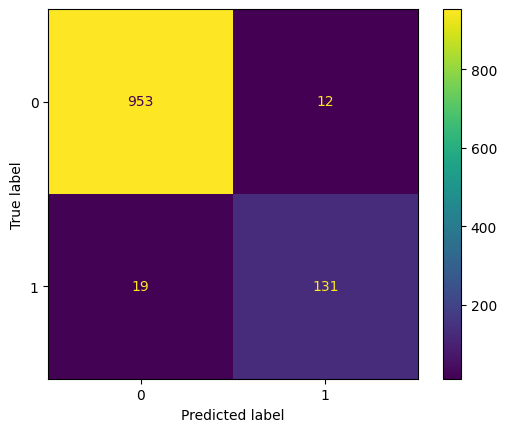

In [567]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

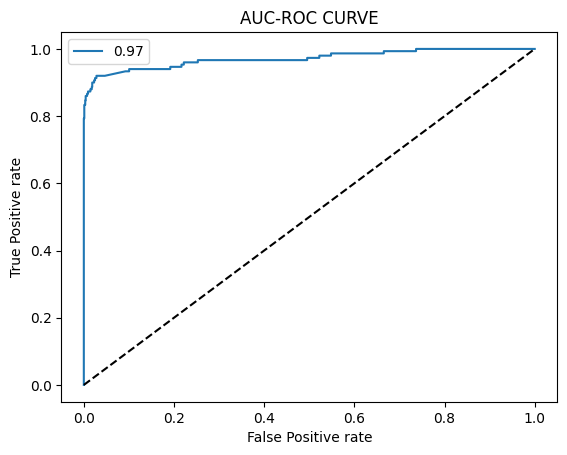

In [568]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob=nb.predict_proba(x_test)[:,1]

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label=f"{round(roc_auc_score(y_test,y_pred_prob),2)}")
plt.plot([0,1],[0,1],linestyle="dashed",color="black")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("AUC-ROC CURVE")
plt.legend()
plt.show()

#### TF-IDF

In [569]:
#Convert text to vector 
from sklearn.feature_extraction.text import TfidfVectorizer
vector1=TfidfVectorizer(stop_words="english")
x1=vector.fit_transform(df["text_clean"])


In [570]:
y=df["label"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=42)

In [571]:
from sklearn.naive_bayes import MultinomialNB
nb2=MultinomialNB()
nb2.fit(x_train,y_train)

MultinomialNB()

In [572]:
train_accuracy=nb2.score(x_train,y_train)
print(train_accuracy)

0.980480143594346


In [573]:
y_pred_test=nb2.predict(x_test)

In [574]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred_test))

0.9721973094170404


In [575]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       965
           1       0.92      0.87      0.89       150

    accuracy                           0.97      1115
   macro avg       0.95      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



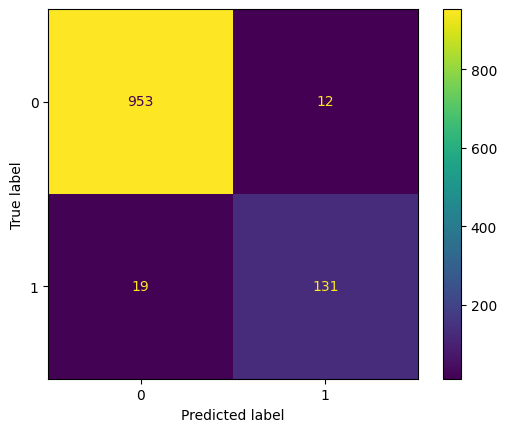

In [576]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_test)
ConfusionMatrixDisplay(cm).plot()
plt.show()

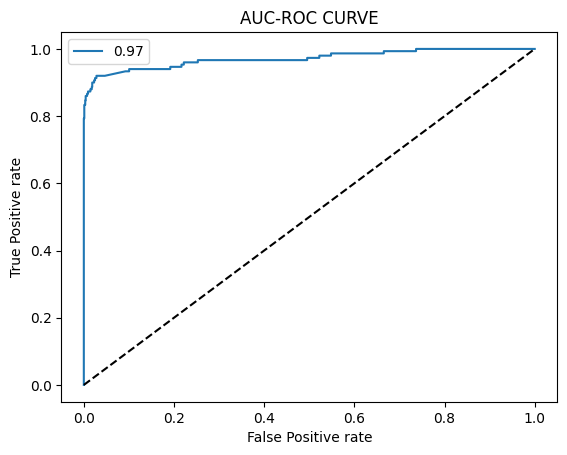

In [577]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob=nb2.predict_proba(x_test)[:,1]

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label=f"{round(roc_auc_score(y_test,y_pred_prob),2)}")
plt.plot([0,1],[0,1],linestyle="dashed",color="black")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("AUC-ROC CURVE")
plt.legend()
plt.show()

#### Average Word2vec

In [578]:
def text_words(text):
    words=word_tokenize(text)
    clean_word=[word for word in words if word not in stopword and len(word)>2]
    return clean_word

df["text_clean"]=df["text_clean"].apply(text_words)

In [579]:
df["text_clean"][0]

['jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [580]:
! pip install gensim

In [581]:
from gensim.models import Word2Vec
model=Word2Vec(sentences=df["text_clean"],vector_size=100,window=5,min_count=1,workers=4,sg=0,seed=42)

vector=model.wv["world"]
similar=model.wv.most_similar("world",topn=5)
print(similar)

[('like', 0.9984803199768066), ('back', 0.9983758330345154), ('give', 0.9983623623847961), ('today', 0.99833744764328), ('would', 0.998319149017334)]


In [582]:
print(vector)

[ 4.52701524e-02 -4.09135260e-02 -1.34145021e-01  1.27705960e-02
 -1.04896784e-01  1.07087195e-01  1.28977612e-01  9.74427238e-02
 -4.79977801e-02 -5.89646548e-02 -1.98704809e-01  8.85617360e-02
  4.84851450e-02  1.81086376e-01 -8.75505283e-02 -1.17689982e-01
  7.13539794e-02 -1.57141626e-01 -1.05581991e-01 -5.57210371e-02
  4.86677811e-02  1.35508224e-01  4.01072204e-02  1.49955437e-01
  5.12659997e-02  5.46791730e-03 -1.67583391e-01  9.05356705e-02
 -1.12423554e-01 -1.00556396e-01 -5.09891585e-02 -4.84287068e-02
  7.54584819e-02 -2.74547935e-02  8.33285451e-02 -3.41491029e-02
  9.08020809e-02 -2.79350728e-01  3.97647023e-02  1.00443572e-01
  5.49172722e-02  1.31702330e-02  2.31814235e-01 -3.49505395e-02
  3.51594873e-02  7.15954453e-02  1.08847670e-01  1.27050847e-01
  2.61145711e-01 -4.86021526e-02 -1.31486565e-01 -3.41506153e-01
 -1.87499188e-02  6.49395958e-02  9.34371948e-02 -2.22565886e-02
 -6.43053576e-02  5.44501767e-02 -1.09535698e-02  1.72777563e-01
 -6.18720427e-02 -4.42259

In [583]:
import numpy as np
def sentence_vector(text,model):
    vecs=[model.wv[word] for word in text]
    if not vecs:
        return np.zeros(model.vector_size)
    return np.mean(vecs,axis=0)

df["vector"]=df["text_clean"].apply(lambda x:sentence_vector(x,model))

In [584]:
df["vector"][0]

array([ 0.03540075, -0.0309178 , -0.11095393,  0.01246456, -0.0857052 ,
        0.08626284,  0.11217188,  0.08804775, -0.04051755, -0.04776962,
       -0.17724852,  0.07118413,  0.05028306,  0.16324289, -0.06699108,
       -0.09684587,  0.06235785, -0.14405307, -0.09021308, -0.04064242,
        0.04954354,  0.11969206,  0.03825317,  0.12832502,  0.04705417,
        0.00682815, -0.14748915,  0.08496959, -0.09786421, -0.08305416,
       -0.03774483, -0.0386792 ,  0.07397906, -0.03011781,  0.06588087,
       -0.02973065,  0.08309717, -0.2411687 ,  0.03363576,  0.08803865,
        0.04577347,  0.00506738,  0.20350873, -0.02638034,  0.03665556,
        0.05542704,  0.09531132,  0.11193383,  0.22381741, -0.05062141,
       -0.11328154, -0.29340163, -0.02038821,  0.06381685,  0.07394996,
       -0.02038805, -0.04932246,  0.04819018, -0.01015672,  0.14482023,
       -0.04826674, -0.03941014, -0.10991185,  0.05056225,  0.09037878,
        0.0605977 ,  0.09652808, -0.07634915, -0.12250957,  0.00

In [585]:
df["vector"][0].shape

(100,)

In [586]:
X=np.vstack(df["vector"].values)

In [587]:
print(X.shape)

(5572, 100)


In [588]:
X_df=pd.DataFrame(X,columns=list(range(100)))
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.035401,-0.030918,-0.110954,0.012465,-0.085705,0.086263,0.112172,0.088048,-0.040518,-0.047770,...,-0.182612,0.187384,0.043233,-0.143301,0.070819,-0.070877,-0.029577,0.112680,-0.088842,0.002150
1,0.016251,-0.013016,-0.059305,0.005495,-0.046025,0.045338,0.052505,0.042043,-0.019689,-0.019158,...,-0.091684,0.089157,0.022166,-0.075910,0.033552,-0.032035,-0.017263,0.056995,-0.044209,-0.000156
2,0.047976,-0.039494,-0.135226,0.021419,-0.107301,0.110067,0.144796,0.106261,-0.051889,-0.062654,...,-0.235225,0.234744,0.053919,-0.175217,0.086520,-0.086799,-0.042206,0.140446,-0.116776,0.001434
3,0.060171,-0.048738,-0.195475,0.022078,-0.147082,0.153185,0.199670,0.155773,-0.071283,-0.080619,...,-0.329246,0.334396,0.066482,-0.256321,0.125297,-0.124822,-0.059444,0.195215,-0.160548,0.003214
4,0.059835,-0.046248,-0.178786,0.020592,-0.131679,0.136912,0.185822,0.143018,-0.064808,-0.076686,...,-0.294277,0.301000,0.067098,-0.233716,0.112292,-0.108126,-0.050042,0.176400,-0.142163,-0.000395


In [589]:
X_df["label"]=df["label"]
y=df["label"]
x=X_df.iloc[:,:-1]
#y=X_df.loc[:,["label"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [590]:
from sklearn.linear_model import LogisticRegression
logic=LogisticRegression()
logic.fit(x_train,y_train)

LogisticRegression()

In [591]:
train_accuracy=logic.score(x_train,y_train)
print(train_accuracy)

0.8653803006506618


In [592]:
y_pred_word=logic.predict(x_test)

In [593]:
print(accuracy_score(y_pred_word,y_test))

0.863677130044843


In [594]:
print(classification_report(y_test,y_pred_word))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       965
           1       0.00      0.00      0.00       150

    accuracy                           0.86      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.86      0.80      1115



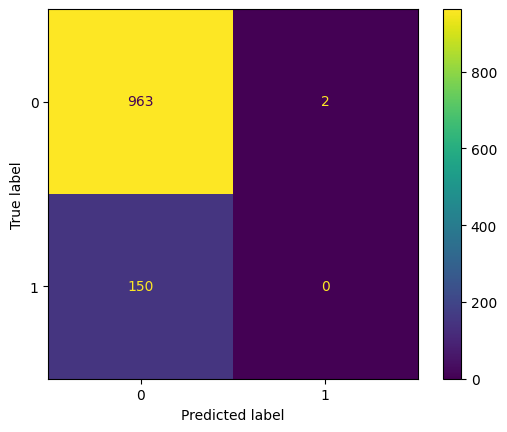

In [595]:
cm=confusion_matrix(y_test,y_pred_word)
ConfusionMatrixDisplay(cm).plot()
plt.show()

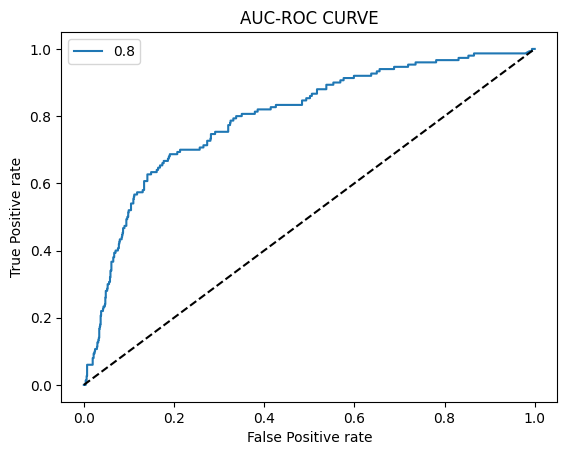

In [596]:
from sklearn.metrics import roc_auc_score,roc_curve
y_pred_prob=logic.predict_proba(x_test)[:,1]

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label=f"{round(roc_auc_score(y_test,y_pred_prob),2)}")
plt.plot([0,1],[0,1],linestyle="dashed",color="black")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("AUC-ROC CURVE")
plt.legend()
plt.show()

#### Comparison

In [597]:
word_embedding=pd.DataFrame({"BagofWords":0.97,"TF-IDF":0.97,"AverageWord2vec":0.8},index=["AUC-ROC"])
word_embedding_df=word_embedding.T
word_embedding_df=word_embedding_df.reset_index()
word_embedding_df



,index,AUC-ROC
0,BagofWords,0.97
1,TF-IDF,0.97
2,AverageWord2vec,0.80


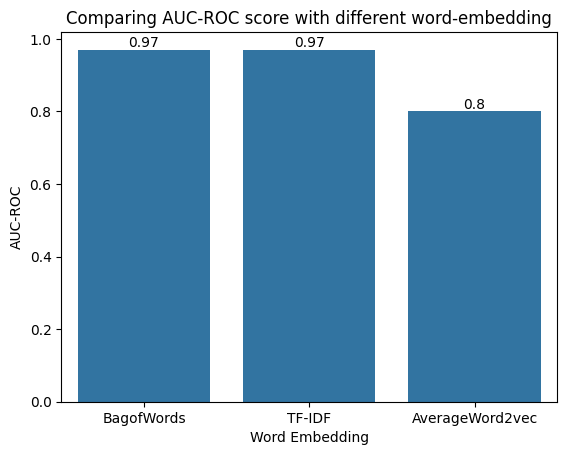

BagofWords and TF-IDF works pretty well in the spam classifier dataset.


In [598]:
bar=sns.barplot(x="index",y="AUC-ROC",data=word_embedding_df)
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{height}",ha="center",va="bottom")
    
plt.title("Comparing AUC-ROC score with different word-embedding")
plt.xlabel("Word Embedding")
plt.show()
print("BagofWords and TF-IDF works pretty well in the spam classifier dataset.")